<a href="https://colab.research.google.com/github/hjoddi/REI201G-python-projects/blob/main/Lokaverkefni_HjorvarSigurdsson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VV7. Lágmörkun Rosenbrock-falls**


x0 = (-1.2, 1): 24.199999999999996
x* = (0,0): 1


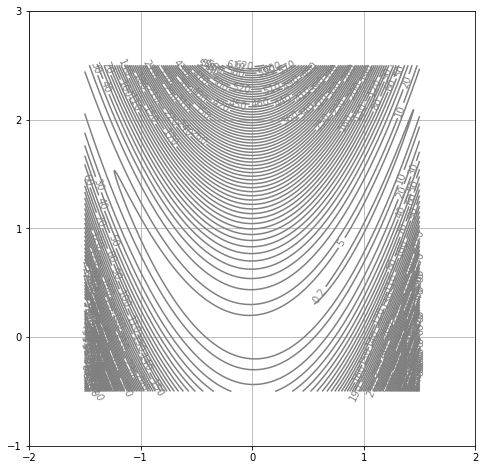

In [ ]:
#1. Undirbúningur og teikning

def rosen(x):
  res = (1-x[0])**2 + 100*(x[1] - x[0]**2)**2
  return res

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
x = np.linspace(-1.5,1.5,600)
y = np.linspace(-0.5,2.5,600)
[X,Y] = np.meshgrid(x,y)
Z = rosen([X,Y])
levels = [0.2, 5, 10] + list(range(20,800,10))
c = plt.contour(X, Y, Z, levels = levels, colors = 'gray')
levstr = {l:str(l) for l in levels}
plt.clabel(c, fmt=levstr)
plt.xticks(range(-2,3))
plt.yticks(range(-1,4))
plt.grid("True")

print(f"x0 = (-1.2, 1): {rosen([-1.2,1])}")
print(f"x* = (0,0): {rosen([0,0])}")

In [ ]:
#2. Einföld lágmörkun

import scipy.optimize as opt

vv7d2x0 = [-1.2, 1]
vv7d2x0Minimized = opt.minimize(rosen, vv7d2x0)
print(vv7d2x0Minimized)
print(rosen([0.99999094, 0.99998184]))
print(vv7d2x0Minimized.x)

      fun: 8.22357031488345e-11
 hess_inv: array([[0.49749361, 0.9936991 ],
       [0.9936991 , 1.98985664]])
      jac: array([ 1.31131659e-06, -5.24011874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 31
     njev: 38
   status: 0
  success: True
        x: array([0.99999094, 0.99998184])
8.224425734219347e-11
[0.99999094 0.99998184]


Success: True vísar til þess að það tókst að finna lágmark.

X: birtir vigurinn sem inniheldur lausn lágmarkarinnar.

fun: birtir útkomu rosen() fallsins þegar hún er keyrð með lausn lágmarkarinnar sem stiku.

message: birtir skilaboð sem segir hvers vegna lágmörkun lauk. status: segir einnig til um hvers vegna lágmörkun lauk.

nit: segir til um hversu margar ítranir lágmörkun tók.

Lausn þessarar lágmörkunnar er vigurinn [0.99999094, 0.99998184], en þegar vigurinn er sendur í fallið rosen() fæst útkoman 8.22357031488345e-11. Það tók 31 ítranir að finna lágmark.

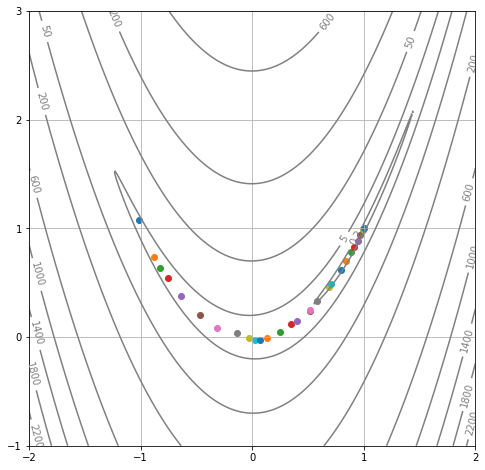

In [ ]:
#3. Teikning ítrekunargilda

def cb(x):
  plt.scatter(x[0],x[1])

plt.figure(figsize=(8,8))
x = np.linspace(-2,2,400)
y = np.linspace(-1,3,400)
[X,Y] = np.meshgrid(x,y)
Z = rosen([X,Y])
levels = [0.2, 5, 50] + list(range(200,2300,400))
c = plt.contour(X, Y, Z, levels = levels, colors = 'gray')
levstr = {l:str(l) for l in levels}
plt.clabel(c, fmt=levstr)
plt.xticks(range(-2,3))
plt.yticks(range(-1,4))
plt.grid("True")

vv7d3x0Minimized = opt.minimize(rosen, vv7d2x0, callback=cb)

In [ ]:
#4. Mismunandi aðferðir

vv7d4Minimized1 = opt.minimize(rosen, vv7d2x0, method="L-BFGS-B")
print(vv7d4Minimized1)
print()
vv7d4Minimized2 = opt.minimize(rosen, vv7d2x0, method="CG")
print(vv7d4Minimized2)
print()
vv7d4Minimized3 = opt.minimize(rosen, vv7d2x0, method="Powell")
print(vv7d4Minimized3)
print()
vv7d4Minimized4 = opt.minimize(rosen, vv7d2x0, method="BFGS")
print(vv7d4Minimized4)
print()

      fun: 1.0700307867815184e-11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.22183348e-06,  1.84504682e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 132
      nit: 36
   status: 0
  success: True
        x: array([0.99999673, 0.99999346])

     fun: 1.0377824021054427e-11
     jac: array([4.63150166e-07, 1.02482420e-06])
 message: 'Optimization terminated successfully.'
    nfev: 373
     nit: 37
    njev: 93
  status: 0
 success: True
       x: array([0.99999678, 0.99999355])

   direc: array([[1.21577431e-02, 2.56492590e-02],
       [1.42194769e-06, 2.71652508e-06]])
     fun: 1.787366526385165e-26
 message: 'Optimization terminated successfully.'
    nfev: 665
     nit: 23
  status: 0
 success: True
       x: array([1., 1.])

      fun: 8.22357031488345e-11
 hess_inv: array([[0.49749361, 0.9936991 ],
       [0.9936991 , 1.98985664]])
      jac: array([ 1.31131659e-06, -5.24011874e-06])
  message: 'Optimization termi

Aðferð | Fjöldi ítrekana | Fjöldi kalla á rosen() | Fallsgildi
-------|:---------------:|:---------:|------
L-BFGS-B| 36 | 132 | 1.0700307867815184e-11
CG | 37 | 373 | 1.0377824021054427e-11
Powell | 23 | 665 | 1.787366526385165e-26
BFGS | 31 | 152 | 8.22357031488345e-11

Eins og sjá má á töflunni hér að ofan, Hefur Powell aðferðin fæstar ítrekanir, en því næst BFGS, síðan L-BFGS-B og loks CG. L-BFGS-B hefur fæst köll á rosen(), en því næst BFGS, síðan CG og loks Powell. Fallsgildi Powells er mun minna en fallsgildi hinna fallana.

In [ ]:
#5. Stigull forritaður

def rosg(x):
  hlAfleidaX = -2*(1-x[0])-400*x[0]*(x[1]-x[0]**2)
  hlAfleidaY = 200*(x[1]-x[0]**2)
  listHlAfleidur = [hlAfleidaX,hlAfleidaY]

  return np.array(listHlAfleidur)

print(rosg([-1.2,1]))
print(rosg([1,1]))

[-215.6  -88. ]
[0 0]


In [ ]:
#6. Lágmörkun með hjálp stiguls

vv7d6Minimized = opt.minimize(rosen, vv7d2x0, jac=rosg)
print(vv7d6Minimized)

      fun: 2.5353060217324033e-15
 hess_inv: array([[0.50186009, 1.00315326],
       [1.00315326, 2.01027465]])
      jac: array([-1.70451456e-06,  8.23258706e-07])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 32
     njev: 39
   status: 0
  success: True
        x: array([0.99999997, 0.99999995])


Í lið 2 (sem og í lið 4) var notað aðferðina BFGS, en fjöldi ítrekana var 31 og fjöldi kalla á rosen() var 152.
Í þessum lið, þegar minimize aðferðin er látin nota stigulinn úr rosg(), er fjöldi ítrekana 32 og fjöldi kalla á rosen() 39.
Notkun stigulsins fylgir því mikil fækkun í fjölda kalla á fallið rosen().

## **VV8. Jarðskjálftar og eldgos**

In [ ]:
#1. Skjálftaskrá lesin

import pandas as pd

skrá = 'https://cs.hi.is/python/skjalftar.txt'
vv8df = pd.read_csv(skrá, header=None, skiprows=1, delim_whitespace=True, names=['tími','breidd','lengd', 'M'])

breiddArray = np.array(vv8df['breidd'])
lengdArray = np.array(vv8df['lengd'])
MArray = np.array(vv8df['M'])

tími = pd.to_datetime(vv8df.tími)
dagur1 = pd.to_datetime('24.02.2021')
dagur = (tími - dagur1).dt.total_seconds()/(60*60*24)

0       0.337465
1       0.362917
2       0.367361
3       0.373773
4       0.389155
         ...    
133    18.804306
134    19.855486
135    23.144317
136    23.153981
137    23.161840
Name: tími, Length: 138, dtype: float64


Text(0, 0.5, 'Breidd skjálfta')

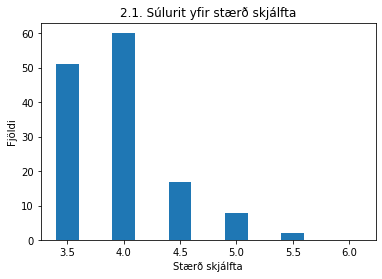

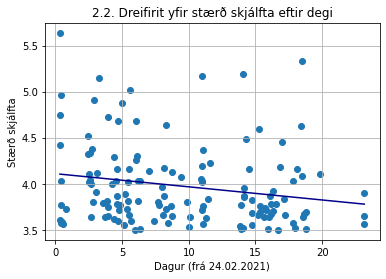

<Figure size 432x288 with 0 Axes>

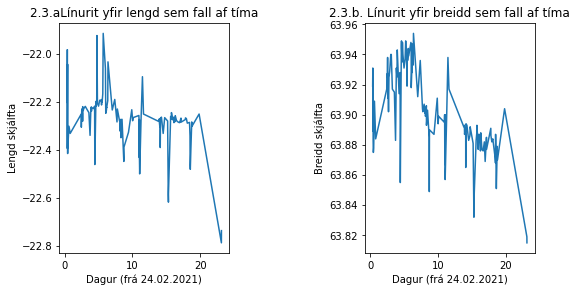

In [ ]:
#2. Línurit og töflur
fjoldiSkjalfta = len(MArray)

#2.1. Súlurit yfir stærð skjálftanna
def fjoldiAfHverriStaerd(fylki):
  count35 = 0
  count4 = 0
  count45 = 0
  count5 = 0
  count55 = 0
  count6 = 0

  for x in range(0, len(fylki)):
    if (fylki[x] >= 5.75): count6 += 1
    elif (fylki[x] >= 5.25): count55 += 1
    elif (fylki[x] >= 4.75): count5 += 1
    elif (fylki[x] >= 4.25): count45 += 1
    elif (fylki[x] >= 3.75): count4 += 1
    else: count35 += 1
  
  count = np.array([count35,count4,count45,count5,count55,count6])
  
  return count

x1 = np.linspace(3.5, 6.0, 6)
y1 = fjoldiAfHverriStaerd(MArray)

sulurit1 = plt.bar(x1, y1, width=0.2)
plt.xlabel('Stærð skjálfta')
plt.ylabel('Fjöldi')
plt.title('2.1. Súlurit yfir stærð skjálfta')

#2.2. Dreifirit yfir stærð skjálfta eftir degi
plt.figure()
X2 = np.c_[dagur, MArray]
(x2,y2) = X2.T
m22, b22 = np.polyfit(x2, y2, 1)
dreifirit22 = plt.scatter(x2,y2)
plt.xlabel('Dagur (frá 24.02.2021)')
plt.ylabel('Stærð skjálfta')
plt.grid()
plt.title('2.2. Dreifirit yfir stærð skjálfta eftir degi')
plt.plot(x2,m22*x2 + b22, color='darkblue')

#2.3. Línurit yfir lengd og breidd sem fall af tíma
plt.figure()

fig, ax = plt.subplots(1, 2)
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.8)
plt.subplot(1,2,1)
plt.plot(dagur, lengdArray)
plt.title('2.3.aLínurit yfir lengd sem fall af tíma')
plt.xlabel('Dagur (frá 24.02.2021)')
plt.ylabel('Lengd skjálfta')

plt.subplot(1,2,2)
plt.plot(dagur, breiddArray)
plt.title('2.3.b. Línurit yfir breidd sem fall af tíma')
plt.xlabel('Dagur (frá 24.02.2021)')
plt.ylabel('Breidd skjálfta')

Af súluriti 2.1 má sjá að flestir skjálftarnir voru um það bil af stærð 4, en aðeins færri voru af stærð 3.5. Talsvert færri voru svo af stærð 4.5, enn færri af stærð 5, og fæstir af stærð 5.5.

Af dreifiriti 2.2 má sjá að meðalstærð skjálftanna fór minnkandi eftir því sem að fleiri dagar höfðu liðið frá 24.02.2021.

Af línuriti 2.3.a og 2.3.b má sjá að talsverðar sveiflur eru annars vegar á lengd skjálfta en hins vegar á breidd hans. Þó virðist sem svo að bæði lengd og breidd skjálftanna séu minnkandi.

In [ ]:
#3. Breytt úr hnattstöðu í xy-hnit

!pip install pyproj

from pyproj import Transformer as Trans
hnatt2xy = Trans.from_crs('latlon',3057).transform
(x3,y3) = hnatt2xy(breiddArray,lengdArray)

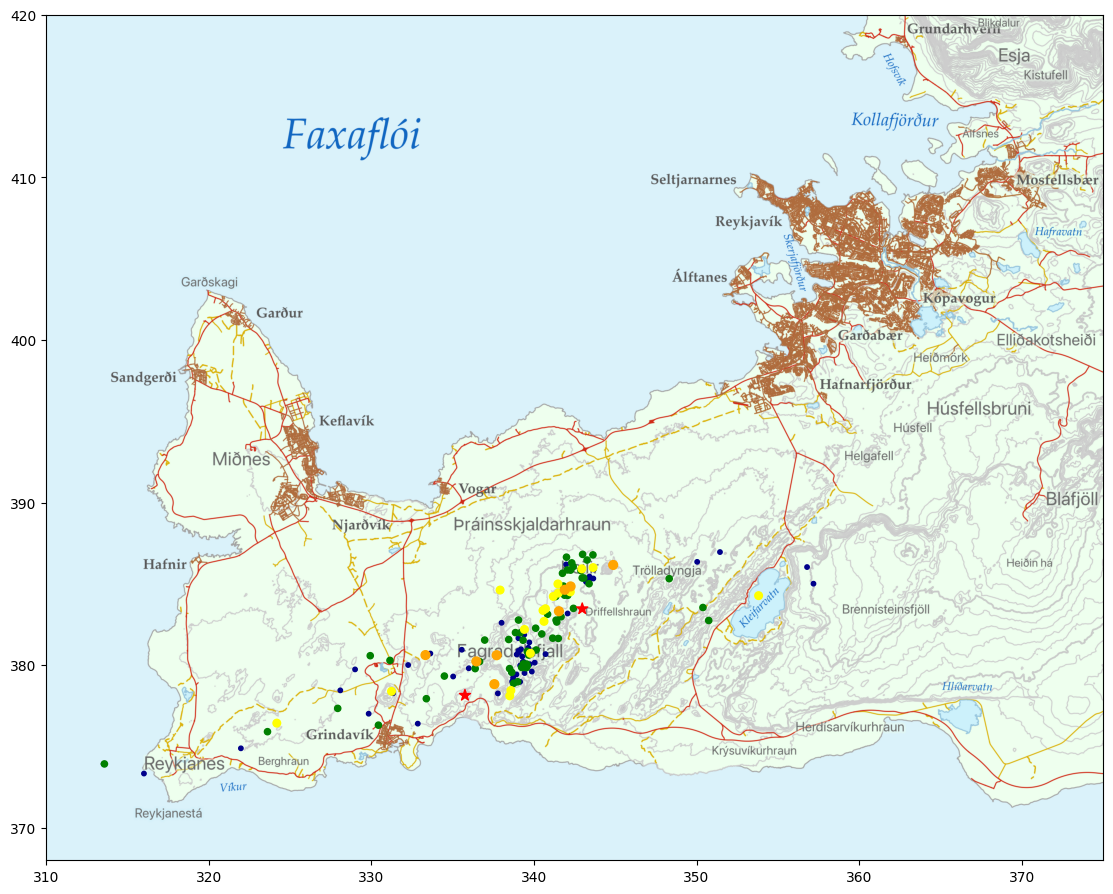

In [ ]:
#4. Landakort með skjálftum

#4.1. KORTFÖLL

def lesa_qgis_kort(skrá):
  # Les kort úr skrá.png og skrá.pgw og skilar pari (kort,mörk) með þrívíðu
  # NumPy-fylki með kortinu ásamt fjögurra staka vigur með hnitum í kílómetrum
  # á vestur-, austur-, suður- og norðurbrúnum kortsins, mörk = [xv,xa,ys,yn].
  kort = np.flipud(plt.imread(skrá + ".png")) # svo kortið sé ekki á hvolfi
  world = np.loadtxt(skrá + ".pgw")
  (hæð,breidd) = np.shape(kort)[0:2]
  skali = world[0]  # metrar á díl (pixel) í png-skránni
  xv = world[4]
  xa = xv + skali*breidd
  yn = world[5]
  ys = yn - skali*hæð
  mörk = np.array([xv,xa,ys,yn])/1000  # breytt í km
  return (kort,mörk)

def sýna_kort(kort, mörk, gluggabreidd, dpi=100):
  # Birtir kort í Matplotlib glugga og setur mörk ása til samræmis við mörk
  # kortsins; gluggabreidd og dpi eru notuð til að búa gluggan til með
  # plt.figure kalli, sem gefur glugganum tilgreinda breidd (í tommum) og hæð
  # sem ákvarðast hlutfallslega eftir lögun kortsins
  (hæð, breidd) = np.shape(kort)[0:2]
  plt.figure(figsize=(gluggabreidd, gluggabreidd*hæð/breidd), dpi=dpi)
  plt.axis(mörk)
  plt.imshow(kort, origin='lower', extent=plt.axis())

#4.2.
skrá = 'https://cs.hi.is/python/reykjanesskagi'
(kort,mörk) = lesa_qgis_kort(skrá)
sýna_kort(kort, mörk, 14)

# Bý til lista og svo fylki af hnitum skjálfta af hverri stærð.
listX35 = []
listY35 = []
listSize35 =[]
listX4 = []
listY4 = []
listSize4 = []
listX45 = []
listY45 = []
listSize45 = []
listX5 = []
listY5 = []
listSize5 = []
listX55 = []
listY55 = []
listSize55 = []
listX6 = []
listY6 = []
listSize6 = []

for x in range(0, len(MArray)):
  if (MArray[x] >= 5.75): 
    listX6.append(breiddArray[x])
    listY6.append(lengdArray[x])
    listSize6.append(80)
  elif (MArray[x] >= 5.25):
    listX55.append(breiddArray[x])
    listY55.append(lengdArray[x])
    listSize55.append(70)
  elif (MArray[x] >= 4.75):
    listX5.append(breiddArray[x])
    listY5.append(lengdArray[x])
    listSize5.append(40)
  elif (MArray[x] >= 4.25):
    listX45.append(breiddArray[x])
    listY45.append(lengdArray[x])
    listSize45.append(30)
  elif (MArray[x] >= 3.75):
    listX4.append(breiddArray[x])
    listY4.append(lengdArray[x])
    listSize4.append(20)
  else:
    listX35.append(breiddArray[x])
    listY35.append(lengdArray[x])
    listSize35.append(10)

arrayX35 = np.array(listX35)
arrayY35 = np.array(listY35)
arraySize35 = np.array(listSize35)
(X35,Y35) = hnatt2xy(arrayX35,arrayY35)
arrayX4 = np.array(listX4)
arrayY4 = np.array(listY4)
arraySize4 = np.array(listSize4)
(X4,Y4) = hnatt2xy(arrayX4,arrayY4)
arrayX45 = np.array(listX45)
arrayY45 = np.array(listY45)
arraySize45 = np.array(listSize45)
(X45,Y45) = hnatt2xy(arrayX45,arrayY45)
arrayX5 = np.array(listX5)
arrayY5 = np.array(listY5)
arraySize5 = np.array(listSize5)
(X5,Y5) = hnatt2xy(arrayX5,arrayY5)
arrayX55 = np.array(listX55)
arrayY55 = np.array(listY55)
arraySize55 = np.array(listSize55)
(X55,Y55) = hnatt2xy(arrayX55,arrayY55)
arrayX6 = np.array(listX6)
arrayY6 = np.array(listY6)
arraySize6 = np.array(listSize6)
(X6,Y6) = hnatt2xy(arrayX6,arrayY6)

# Teikna skjálftana á kortið.
plt.scatter((X35 / 1000),(Y35 / 1000), arraySize35, color='Darkblue')
plt.scatter((X4 / 1000), (Y4 / 1000), arraySize4, color='Green')
plt.scatter((X45 / 1000), (Y45 / 1000), arraySize45, color='Yellow')
plt.scatter((X5 / 1000), (Y5 / 1000), arraySize5, color='Orange')
plt.scatter((X55 / 1000), (Y55 / 1000), arraySize55, marker='*', color='Red')


Á myndinni hér að ofan má sjá á hvaða svæði skjálftarnir voru. Stakir skjálftar voru í kringum Kleifarvatn, sem og frá vestur við Fagradalsfjall að sjónum vestur við Reykjanes. Flestir skjálftar voru þó á Fagradalsfjalls-svæðinu sem og vestur- og norð-vestur við Driffellshraun. Skjálftarnir eru litaðir eftir stærð og lit, en frá þeirra minnstu til þeirra stærstu eru þeir merktir bláir, grænir, gulir, appelsínugulir, og rauðir. Stærstu skjálftarnir eru merktir með stjörnu, umfram að vera merktir rauðir.

In [ ]:
!wget -nc cs.hi.is/colab2pdf/colab2pdf.py &> /dev/null
from colab2pdf import convert
convert()

Running mount...Mounted at /content/drive
Running: apt update... apt install... nbconvert...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>